<a href="https://colab.research.google.com/github/Karthik192/StockMarketPrediction/blob/main/StockPrediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [57]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import pandas_datareader as web
import datetime as dt

In [58]:
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, LSTM

In [59]:
# Load data
company = 'FB'

start = dt.datetime(2012,1,1)
end = dt.datetime(2020,1,1)

data = pd.read_csv('FB.csv')

In [60]:
print(data)

            Date        Open        High  ...       Close   Adj Close     Volume
0     2012-05-18   42.049999   45.000000  ...   38.230000   38.230000  573576400
1     2012-05-21   36.529999   36.660000  ...   34.029999   34.029999  168192700
2     2012-05-22   32.610001   33.590000  ...   31.000000   31.000000  101786600
3     2012-05-23   31.370001   32.500000  ...   32.000000   32.000000   73600000
4     2012-05-24   32.950001   33.209999  ...   33.029999   33.029999   50237200
...          ...         ...         ...  ...         ...         ...        ...
1912  2019-12-24  206.300003  206.789993  ...  205.119995  205.119995    6046300
1913  2019-12-26  205.570007  207.820007  ...  207.789993  207.789993    9350700
1914  2019-12-27  208.669998  208.929993  ...  208.100006  208.100006   10284200
1915  2019-12-30  207.860001  207.899994  ...  204.410004  204.410004   10524300
1916  2019-12-31  204.000000  205.559998  ...  205.250000  205.250000    8953500

[1917 rows x 7 columns]


In [61]:
# Prepare data
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(data['Close'].values.reshape(-1, 1))

In [62]:
prediction_days = 60

x_train = []
y_train = []

for x in range(prediction_days, len(scaled_data)):
  x_train.append(scaled_data[x-prediction_days:x, 0])
  y_train.append(scaled_data[x, 0])

x_train, y_train = np.array(x_train), np.array(y_train)
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))

In [63]:
# Build the model
model = Sequential()

model.add(LSTM(units=50, return_sequences=True, input_shape=(x_train.shape[1], 1)))
model.add(Dropout(0.2))
model.add(LSTM(units=50, return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(units=50))
model.add(Dropout(0.2))
model.add(Dense(units=1)) # Prediction of next price

In [64]:
model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(x_train, y_train, epochs=25, batch_size=32)

Epoch 1/25
59/59 [==============================] - 18s 143ms/step - loss: 0.0283
Epoch 2/25
59/59 [==============================] - 9s 146ms/step - loss: 0.0043
Epoch 3/25
59/59 [==============================] - 9s 147ms/step - loss: 0.0041
Epoch 4/25
59/59 [==============================] - 9s 148ms/step - loss: 0.0042
Epoch 5/25
59/59 [==============================] - 5s 90ms/step - loss: 0.0032
Epoch 6/25
59/59 [==============================] - 5s 91ms/step - loss: 0.0036
Epoch 7/25
59/59 [==============================] - 5s 91ms/step - loss: 0.0031
Epoch 8/25
59/59 [==============================] - 5s 91ms/step - loss: 0.0029
Epoch 9/25
59/59 [==============================] - 5s 90ms/step - loss: 0.0037
Epoch 10/25
59/59 [==============================] - 5s 90ms/step - loss: 0.0028
Epoch 11/25
59/59 [==============================] - 5s 89ms/step - loss: 0.0031
Epoch 12/25
59/59 [==============================] - 6s 110ms/step - loss: 0.0027
Epoch 13/25
59/59 [============

In [65]:
# Test the model accuracy on existing data

# Load test data
test_start = dt.datetime(2020,1,1)
test_end = dt.datetime.now()

test_data = pd.read_csv('FB Test.csv')

In [66]:
print(test_data)

           Date        Open        High  ...       Close   Adj Close    Volume
0    2020-01-02  206.750000  209.789993  ...  209.779999  209.779999  12077100
1    2020-01-03  207.210007  210.399994  ...  208.669998  208.669998  11188400
2    2020-01-06  206.699997  212.779999  ...  212.600006  212.600006  17058900
3    2020-01-07  212.820007  214.580002  ...  213.059998  213.059998  14912400
4    2020-01-08  213.000000  216.240005  ...  215.220001  215.220001  13475000
..          ...         ...         ...  ...         ...         ...       ...
491  2021-12-13  330.950012  341.089996  ...  334.489990  334.489990  22948700
492  2021-12-14  328.049988  335.700012  ...  333.739990  333.739990  20461000
493  2021-12-15  332.489990  342.109985  ...  341.660004  341.660004  24681300
494  2021-12-16  338.980011  344.459991  ...  334.899994  334.899994  22635000
495  2021-12-17  332.799988  337.109985  ...  333.790009  333.790009  39711700

[496 rows x 7 columns]


In [67]:
actual_prices = test_data['Close'].values

total_dataset = pd.concat((data['Close'], test_data['Close']), axis=0)

model_inputs = total_dataset[len(total_dataset) - len(test_data) - prediction_days : ].values
model_inputs = model_inputs.reshape(-1, 1)
model_inputs = scaler.transform(model_inputs)

In [68]:
print(model_inputs)

[[0.81068225]
 [0.80102117]
 [0.81153329]
 [0.81243429]
 [0.83325826]
 [0.828703  ]
 [0.8567853 ]
 [0.86008912]
 [0.86429393]
 [0.84156783]
 [0.86114029]
 [0.82399758]
 [0.8430695 ]
 [0.84422088]
 [0.85177954]
 [0.85933821]
 [0.85888771]
 [0.85358162]
 [0.87060116]
 [0.88046251]
 [0.88596887]
 [0.8839666 ]
 [0.87010063]
 [0.8644441 ]
 [0.86654651]
 [0.86038945]
 [0.88471743]
 [0.87831007]
 [0.8781098 ]
 [0.88787108]
 [0.89938426]
 [0.90899538]
 [0.8999349 ]
 [0.90203731]
 [0.9064925 ]
 [0.91134802]
 [0.90724333]
 [0.92241077]
 [0.92060869]
 [0.91089752]
 [0.9064925 ]
 [0.90594187]
 [0.90919558]
 [0.91765532]
 [0.91910695]
 [0.91675424]
 [0.92371224]
 [0.89613055]
 [0.88291536]
 [0.90198728]
 [0.90433999]
 [0.92491365]
 [0.94273413]
 [0.94393554]
 [0.9433348 ]
 [0.93802871]
 [0.95139407]
 [0.95294592]
 [0.93447467]
 [0.93867948]
 [0.96135555]
 [0.95579916]
 [0.97547182]
 [0.97777443]
 [0.98858688]
 [1.00400462]
 [1.00280321]
 [1.02207541]
 [1.00780897]
 [1.01827098]
 [1.0213746 ]
 [1.02

In [69]:
# Make predictions on Test data

x_test = []

for x in range(prediction_days, len(model_inputs)):
  x_test.append(model_inputs[x-prediction_days:x, 0])

x_test = np.array(x_test)
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

In [70]:
print(x_test.shape)

(496, 60, 1)


In [71]:
predicted_prices = model.predict(x_test)
predicted_prices = scaler.inverse_transform(predicted_prices)

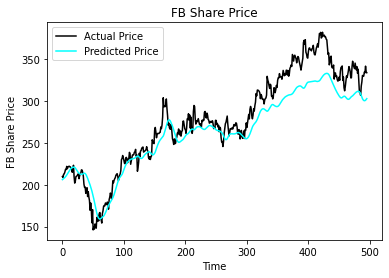

In [72]:
# Plot test predictions

plt.plot(actual_prices, color='Black', label='Actual Price')
plt.plot(predicted_prices, color='Cyan', label='Predicted Price')
plt.title(f"{company} Share Price")
plt.xlabel('Time')
plt.ylabel(f"{company} Share Price")
plt.legend()
plt.show()

In [73]:
# Predict Next Day
real_data = [model_inputs[len(model_inputs) - prediction_days:len(model_inputs+1), 0]]
real_data = np.array(real_data)
real_data = np.reshape(real_data, (real_data.shape[0], real_data.shape[1], 1))

In [74]:
print(real_data.shape)

(1, 60, 1)


In [75]:
prediction = model.predict(real_data)
prediction = scaler.inverse_transform(prediction)
print(f"Prediction: {prediction}")

Prediction: [[303.83752]]
